<a href="https://colab.research.google.com/github/Mohit-Kulkarni1/IPO-Classifier/blob/main/IPO_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

## inserting and preprocessing Dataset

In [2]:
df = pd.read_csv('https://github.com/Mohit-Kulkarni1/IPO-Classifier/blob/main/ipo_2010_2021.csv')

ParserError: ignored

In [4]:
df = pd.read_csv('/content/ipo_2010_2021.csv')


In [5]:
df.head()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
0,29-07-21,Tatva Chintan,https://www.moneycontrol.com/ipo/tatva-chintan...,500.00,2.55,9.78,13.36,9.50,1083.0,2111.8,2310.25,113.32,"2,268.50",109.46
1,23-07-21,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46
2,19-07-21,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98
3,19-07-21,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79
4,07-07-21,India Pesticide,https://www.moneycontrol.com/ipo/india-pestici...,800.00,2.64,1.36,4.40,3.25,296.0,360.0,335.45,13.33,337.40,13.99


In [6]:
df.describe()

,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),Current Gains (%)
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,262.00000
mean,978.718106,23.732841,68.798561,7.388371,25.944886,339.291667,403.329735,363.170152,4.290871,57.14145
std,1884.758112,36.880595,136.513479,11.837761,45.444680,333.874356,437.396998,417.120358,46.343783,240.46593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.500000,1.570000,-97.150000,-99.93000
25%,144.250000,1.130000,1.210000,1.297500,1.570000,109.500000,117.750000,93.025000,-11.755000,-80.50500
50%,441.225000,4.670000,5.075000,3.380000,4.845000,220.000000,251.300000,208.225000,1.355000,-3.92500
75%,903.187500,32.505000,65.112500,8.392500,33.412500,447.000000,546.250000,520.425000,25.635000,94.58000
max,15475.000000,176.850000,958.070000,77.930000,277.280000,1766.000000,2725.000000,3118.650000,153.500000,2500.14000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    264 non-null    object 
 1   IPO Name                264 non-null    object 
 2   Profile                 264 non-null    object 
 3   Issue Size (in crores)  264 non-null    float64
 4   QIB                     264 non-null    float64
 5   HNI                     264 non-null    float64
 6   RII                     264 non-null    float64
 7   Total                   264 non-null    float64
 8   Issue                   264 non-null    float64
 9   Listing Open            264 non-null    float64
 10  Listing Close           264 non-null    float64
 11  Listing Gains(%)        264 non-null    float64
 12  CMP                     264 non-null    object 
 13  Current  Gains (%)      262 non-null    float64
dtypes: float64(10), object(4)
memory usage: 29

In [8]:
# droping missing values as only 2 are present

df.dropna(axis=0,inplace= True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 263
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    262 non-null    object 
 1   IPO Name                262 non-null    object 
 2   Profile                 262 non-null    object 
 3   Issue Size (in crores)  262 non-null    float64
 4   QIB                     262 non-null    float64
 5   HNI                     262 non-null    float64
 6   RII                     262 non-null    float64
 7   Total                   262 non-null    float64
 8   Issue                   262 non-null    float64
 9   Listing Open            262 non-null    float64
 10  Listing Close           262 non-null    float64
 11  Listing Gains(%)        262 non-null    float64
 12  CMP                     262 non-null    object 
 13  Current  Gains (%)      262 non-null    float64
dtypes: float64(10), object(4)
memory usage: 30

In [11]:
df[df['Issue Size (in crores)']==0]

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
161,06-12-12,Tara Jewels,https://www.moneycontrol.com/ipo/tara-jewels_T...,0.0,1.49,3.10,2.05,1.98,230.0,242.00,229.95,-0.02,0.76,-99.67
222,08-10-10,Electrosteel St,https://www.moneycontrol.com/ipo/electrosteel-...,0.0,5.86,28.58,6.19,8.23,11.0,11.15,11.25,2.27,31.05,182.27
259,19-02-10,Thangamayil,https://www.moneycontrol.com/ipo/thangamayil_T...,0.0,0.52,1.52,2.26,1.12,75.0,70.00,71.10,-5.20,870.00,1060.00


In [12]:
df[df['Total']==0]

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%)
9,14-05-21,PowerGrid InvIT,https://www.moneycontrol.com/ipo/powergrid-inv...,7734.99,0.0,0.0,0.0,0.0,100.0,104.0,102.98,2.98,119.00,19.00
11,07-04-21,Barbeque Nat,https://www.moneycontrol.com/ipo/barbeque-nat_...,453.60,0.0,0.0,0.0,0.0,500.0,492.0,590.40,18.08,878.70,75.74
117,11-08-16,Dilip Buildcon,https://www.moneycontrol.com/ipo/dilip-buildco...,430.00,0.0,0.0,0.0,0.0,219.0,240.0,251.95,15.05,560.00,155.71
133,16-11-15,S H Kelkar,https://www.moneycontrol.com/ipo/s-h-kelkar_KC...,200.00,0.0,0.0,0.0,0.0,180.0,216.0,207.30,15.17,169.10,-6.06
207,15-12-10,MOIL,https://www.moneycontrol.com/ipo/moil_M11.html,1260.00,0.0,0.0,0.0,0.0,375.0,551.0,233.25,-37.80,190.10,-49.31


In [15]:
df["date"] = pd.to_datetime(df["Date"])
df["month"] = df['date'].dt.month

In [16]:
df["day"] = df['date'].dt.day
df["year"] = df['date'].dt.year

In [18]:
df.tail()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),date,month,day,year
259,19-02-10,Thangamayil,https://www.moneycontrol.com/ipo/thangamayil_T...,0.00,0.52,1.52,2.26,1.12,75.0,70.00,71.10,-5.20,870.00,1060.00,2010-02-19,2,19,2010
260,15-02-10,Vascon Engineer,https://www.moneycontrol.com/ipo/vascon-engine...,199.80,1.12,3.65,0.62,1.22,165.0,155.90,146.38,-11.28,21.70,-86.85,2010-02-15,2,15,2010
261,15-02-10,Syncom Health,https://www.moneycontrol.com/ipo/syncom-health...,56.25,0.99,16.60,6.25,5.17,75.0,88.00,87.85,17.13,4.06,-94.59,2010-02-15,2,15,2010
262,08-02-10,Jubilant Food,https://www.moneycontrol.com/ipo/jubilant-food...,328.70,59.39,51.95,3.79,31.11,145.0,160.00,114.50,-21.03,"3,770.20",2500.14,2010-08-02,8,2,2010
263,03-02-10,Infinite Comp,https://www.moneycontrol.com/ipo/infinite-comp...,189.80,48.44,106.02,11.08,43.22,165.0,178.35,184.51,11.82,473.75,187.12,2010-03-02,3,2,2010


In [19]:
df[df['Issue Size (in crores)']>df['Issue Size (in crores)'].quantile(0.75)]

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),date,month,day,year
1,23-07-21,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,9375.00,51.79,32.96,7.45,38.25,76.0,115.0,125.85,65.59,133.35,75.46,2021-07-23,7,23,2021
2,19-07-21,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,1546.00,156.37,206.43,9.00,93.41,900.0,1784.4,1585.20,76.13,"1,682.80",86.98,2021-07-19,7,19,2021
3,19-07-21,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,963.28,93.18,73.01,4.89,43.48,837.0,1700.0,1746.80,108.70,"1,730.85",106.79,2021-07-19,7,19,2021
5,05-07-21,Krishna Inst.,https://www.moneycontrol.com/ipo/krishna-inst....,2146.00,5.26,1.89,2.90,3.86,825.0,1009.0,1096.80,32.95,"1,206.60",46.25,2021-05-07,5,7,2021
7,24-06-21,Shyam Metalics,https://www.moneycontrol.com/ipo/shyam-metalic...,909.00,62.18,172.51,5.29,56.56,306.0,380.0,375.85,22.83,436.10,42.52,2021-06-24,6,24,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,20-10-10,Oberoi Realty,https://www.moneycontrol.com/ipo/oberoi-realty...,1028.61,22.15,3.61,0.94,12.13,260.0,280.0,282.95,8.83,672.90,158.81,2010-10-20,10,20,2010
233,16-08-10,Bharat Fin,https://www.moneycontrol.com/ipo/bharat-fin_SM...,1653.97,20.38,18.26,2.81,13.69,985.0,1036.0,1088.58,10.52,898.20,-8.81,2010-08-16,8,16,2010
238,21-05-10,Jaypee Infra,https://www.moneycontrol.com/ipo/jaypee-infra_...,1650.00,1.77,1.15,0.61,1.24,102.0,98.0,91.30,-10.49,2.16,-97.88,2010-05-21,5,21,2010
239,20-05-10,SJVN,https://www.moneycontrol.com/ipo/sjvn_S14.html,1079.00,9.03,3.39,3.12,6.64,26.0,27.1,25.05,-3.65,27.25,4.81,2010-05-20,5,20,2010


In [23]:
df['CMP'] = pd.to_numeric(df['CMP'], errors='coerce')

In [26]:
# Select only the numerical columns for standardization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the selected numerical columns and transform them
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [25]:
# df['CMP'] = scaler.fit_transform(df['CMP'])
df['CMP'].dtype

dtype('float64')

In [27]:
df.head()

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),date,month,day,year
0,29-07-21,Tatva Chintan,https://www.moneycontrol.com/ipo/tatva-chintan...,-0.256455,-0.575240,-0.432461,0.504961,-0.362255,2.224347,3.899196,4.659955,2.347511,NaN,0.217988,2021-07-29,0.040094,1.550308,1.593597
1,23-07-21,Zomato,https://www.moneycontrol.com/ipo/zomato_Z01.html,4.445971,0.758310,-0.262868,0.005850,0.269669,-0.798001,-0.662761,-0.571803,1.319525,-0.366368,0.076325,2021-07-23,0.040094,0.869938,1.593597
2,19-07-21,Clean Science,https://www.moneycontrol.com/ipo/clean-science...,0.297769,3.590613,1.006306,0.136751,1.482086,1.675102,3.151206,2.923421,1.546531,NaN,0.124324,2021-07-19,0.040094,0.416358,1.593597
3,19-07-21,G R Infra,https://www.moneycontrol.com/ipo/g-r-infra_I13...,-0.010986,1.879261,0.030154,-0.210347,0.384625,1.486017,2.958383,3.310462,2.248007,NaN,0.206863,2021-07-19,0.040094,0.416358,1.593597
4,07-07-21,India Pesticide,https://www.moneycontrol.com/ipo/india-pestici...,-0.097500,-0.572802,-0.494065,-0.251728,-0.499630,-0.137706,-0.103026,-0.069799,0.193975,0.440963,-0.179793,2021-07-07,0.040094,-0.944381,1.593597


In [32]:
df[df['Listing Gains(%)']<-0.5]

,Date,IPO Name,Profile,Issue Size (in crores),QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing Gains(%),CMP,Current Gains (%),date,month,day,year
78,25-10-17,General Insuran,https://www.moneycontrol.com/ipo/general-insur...,5.504084,-0.583364,-0.502406,-0.570112,-0.540733,1.711118,1.063051,0.169108,-1.219101,-0.181202,-0.572449,2017-10-25,0.915490,1.096728,0.569002
79,23-10-17,IEX,https://www.moneycontrol.com/ipo/iex_IEE.html,0.008841,-0.574969,-0.497797,-0.402897,-0.520951,3.926105,2.501457,-0.483665,-2.034512,0.810503,-0.545949,2017-10-23,0.915490,0.869938,0.569002
86,18-09-17,Dixon Technolog,https://www.moneycontrol.com/ipo/dixon-technol...,-0.203852,3.002649,2.024673,0.175599,2.006528,4.274260,5.300133,0.512463,-1.541303,NaN,0.359984,2017-09-18,0.623692,0.302964,0.569002
90,10-08-17,SIS,https://www.moneycontrol.com/ipo/sis_SIS07.html,-0.329442,-0.491554,-0.491944,0.953401,-0.418964,1.419988,1.073560,0.032949,-1.247100,1.024948,-0.406787,2017-10-08,0.915490,-0.830986,0.569002
104,17-03-17,Music Broadcast,https://www.moneycontrol.com/ipo/music-broadca...,-0.262533,0.433047,0.294421,0.208535,0.300881,-0.026657,0.018060,-0.730236,-1.860704,-0.796641,-0.623947,2017-03-17,-1.127100,0.189569,0.569002
106,19-12-16,Laurus Labs,https://www.moneycontrol.com/ipo/laurus-labs_L...,-0.224293,-0.358849,-0.477896,-0.489882,-0.471496,0.258470,0.193748,-0.643056,-1.763354,1.640782,-0.031089,2016-12-19,1.499087,0.416358,0.312853
108,08-11-16,Varun Beverages,https://www.moneycontrol.com/ipo/varun-beverag...,0.068873,-0.510512,-0.500943,-0.554066,-0.530183,0.309493,0.056898,-0.381539,-1.253346,2.106664,0.055367,2016-08-11,0.331893,-0.490801,0.312853
118,01-08-16,Advanced Enzyme,https://www.moneycontrol.com/ipo/advanced-enzy...,-0.489590,1.902281,2.372055,0.362237,1.979053,1.663096,1.838913,-0.308802,-1.680435,0.686466,-0.468993,2016-01-08,-1.710697,-0.830986,0.312853
127,18-02-16,Quick Heal Tech,https://www.moneycontrol.com/ipo/quick-heal-te...,-0.282948,-0.526762,-0.235578,-0.300710,-0.333681,-0.062673,-0.228681,-0.263799,-0.539593,0.305847,-0.261124,2016-02-18,-1.418898,0.302964,0.312853
142,11-08-15,Syngene Intl,https://www.moneycontrol.com/ipo/syngene-intl_...,-0.229963,0.749643,0.156215,-0.219636,0.133393,-0.275768,-0.251527,-0.501508,-0.909823,1.629308,0.408149,2015-11-08,1.207289,-0.830986,0.056705


In [33]:
df.columns

Index(['Date', 'IPO Name', 'Profile', 'Issue Size (in crores)', 'QIB', 'HNI',
       'RII', 'Total', 'Issue', 'Listing Open', 'Listing Close',
       'Listing Gains(%)', 'CMP', 'Current  Gains (%)', 'date', 'month', 'day',
       'year'],
      dtype='object')

In [35]:
X = df[['Issue Size (in crores)', 'QIB', 'HNI', 'RII', 'Total', 'Issue', 'month', 'day', 'year']]
y = df['Listing Open']

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

In [40]:
# Train the model
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [41]:
# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

In [55]:
y_predd = rf_regressor.predict(X_train)

In [42]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [43]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.16736603185330204
R-squared: 0.8519107859743834


In [58]:
mean_squared_error(y_train, y_predd)

0.012111922984078873

In [57]:
r2_score(y_train, y_predd)

0.9874745344292293

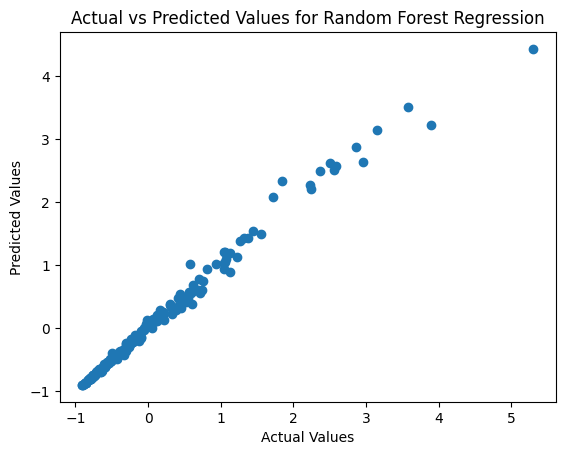

In [59]:
# Plotting actual vs predicted values
plt.scatter(y_train, y_predd)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()

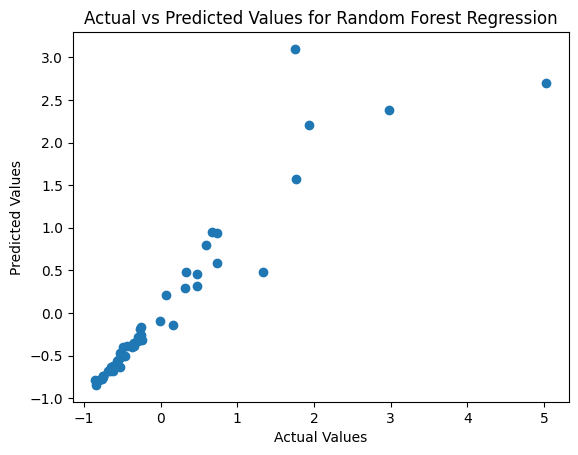

In [44]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()

In [46]:
# Convert the data into LightGBM Dataset format
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [47]:
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [50]:
# Train the model
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000254 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 458
[LightGBM] [Info] Number of data points in the train set: 209, number of used features: 9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score -0.001142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

In [51]:
# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

In [52]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [53]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2616867133981631
R-squared: 0.7684537341361589


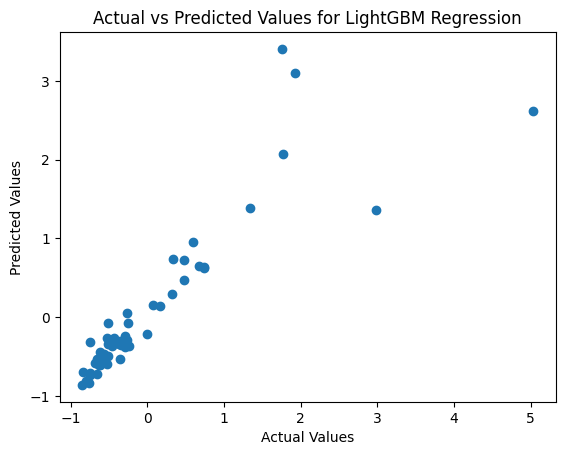

In [54]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for LightGBM Regression')
plt.show()